<div style="text-align: right"><sub>This notebook is distributed under the <a href="https://creativecommons.org/licenses/by-sa/4.0/" target="_blank">Attribution-ShareAlike 4.0 International (CC BY-SA 4.0) license</a>.</sub></div>
<h1>Hands on Machine Learning  <span style="font-size:10px;"><i>by <a href="https://webgrec.ub.edu/webpages/000004/ang/dmaluenda.ub.edu.html" target="_blank">David Maluenda</a></i></span></h1>

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a href="https://atenea.upc.edu/course/view.php?id=85709" target="_blank">
      <img src="https://github.com/dmaluenda/hands_on_machine_learning/raw/master/resources/upc_logo_49px.png" width="130"/>
    </a>
  </td>
  <td>
  </td>
  <td>   <!-- gColab -->
    <a href="https://colab.research.google.com/github/dmaluenda/hands_on_machine_learning/blob/master/02_Training.ipynb" target="_blank">
      <img src="https://github.com/dmaluenda/hands_on_machine_learning/raw/master/resources/colab_logo_32px.png" />
      Run in Google Colab
    </a>
  </td>
  <td>   <!-- github -->
    <a href="https://github.com/dmaluenda/hands_on_machine_learning/blob/master/02_Training.ipynb" target="_blank">
      <img src="https://github.com/dmaluenda/hands_on_machine_learning/raw/master/resources/github_logo_32px.png" />
      View source on GitHub
    </a>
  </td>
  <td>   <!-- download -->
    <a href="https://raw.githubusercontent.com/dmaluenda/hands_on_machine_learning/master/02_Training.ipynb"  target="_blank"
          download="02_Training">
      <img src="https://github.com/dmaluenda/hands_on_machine_learning/raw/master/resources/download_logo_32px.png" />
      Download notebook
      </a>
  </td>
</table>

# $\text{II}$. Training Neural Networks with Pure Python

Hands on "Machine Learning on Classical and Quantum data" course of
[Master in Photonics - PHOTONICS BCN](https://photonics.masters.upc.edu/en/general-information)
[[UPC](https://photonics.masters.upc.edu/en) +
[UB](https://www.ub.edu/web/ub/en/estudis/oferta_formativa/master_universitari/fitxa/P/M0D0H/index.html?) +
[UAB](https://www.uab.cat/web/estudiar/la-oferta-de-masteres-oficiales/informacion-general-1096480309770.html?param1=1096482863713) +
[ICFO](https://www.icfo.eu/lang/studies/master-studies)].

Tutorial 2

This notebook shows how to:
- understand the cost/loss function concept
- implement a stochastic gradient descent to fit an arbitrary nonlinear function
- implement backpropagation in pure python
- train a deep fully connected net to reproduce an image
- differentiate 'hyperparameters' from 'parameters'
- choose a learning rate
- choose a batch size
- differentiate training, validation and test datasets
- initialize a neural network
- save and load networks
- interpret the 'epochs' concept

**References**:

[1] [Machine Learning for Physicists](https://machine-learning-for-physicists.org/) by Florian Marquardt.
<br>
[2] [NumPy](https://numpy.org/doc/stable/user/whatisnumpy.html): the fundamental package for scientific computing in Python.
<br>
[3] [Matplotlib](https://matplotlib.org/stable/tutorials/introductory/usage.html): a comprehensive library for creating static, animated, and interactive visualizations in Python.<br>
[4] "Back-Propagation is very simple. Who made it Complicated?", Prakash Jay at [medium](https://medium.com/@14prakash/back-propagation-is-very-simple-who-made-it-complicated-97b794c97e5c).
<br>
[5] ["A Step by Step Backpropagation Example"](https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/), Matt Mazur.
<br>
[6] [Backpropagation Step by Step](https://hmkcode.com/ai/backpropagation-step-by-step) from hmkcode.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#0.-Imports:-only-numpy-and-matplotlib" data-toc-modified-id="0.-Imports:-only-numpy-and-matplotlib-0">0. Imports: only numpy and matplotlib</a></span></li><li><span><a href="#1.-Nonlinear-fitting-(base-for-training)" data-toc-modified-id="1.-Nonlinear-fitting-(base-for-training)-1">1. Nonlinear fitting (base for training)</a></span><ul class="toc-item"><li><span><a href="#1.1-Function-definition-and-dataset" data-toc-modified-id="1.1-Function-definition-and-dataset-1.1">1.1 Function definition and dataset</a></span></li><li><span><a href="#1.2-Cost-function-(also-known-as-loss-function)" data-toc-modified-id="1.2-Cost-function-(also-known-as-loss-function)-1.2">1.2 Cost function (also known as loss function)</a></span></li><li><span><a href="#1.3-Stochastic-gradient-descent" data-toc-modified-id="1.3-Stochastic-gradient-descent-1.3">1.3 Stochastic gradient descent</a></span></li><li><span><a href="#1.4-Non-constant-learning-rate-(Schedule-or-Adaptive)" data-toc-modified-id="1.4-Non-constant-learning-rate-(Schedule-or-Adaptive)-1.4">1.4 Non constant learning rate (Schedule or Adaptive)</a></span></li></ul></li><li><span><a href="#2.-Backpropagation" data-toc-modified-id="2.-Backpropagation-2">2. Backpropagation</a></span><ul class="toc-item"><li><span><a href="#2.1-Implement-of-backpropagation-for-a-general-(fully-connected)-network" data-toc-modified-id="2.1-Implement-of-backpropagation-for-a-general-(fully-connected)-network-2.1">2.1 Implement of backpropagation for a general (fully connected) network</a></span></li><li><span><a href="#2.2-Train-a-net-on-batches-to-fit-a-2D-function-(an-arbitrary-image)" data-toc-modified-id="2.2-Train-a-net-on-batches-to-fit-a-2D-function-(an-arbitrary-image)-2.2">2.2 Train a net on batches to fit a 2D function (an arbitrary image)</a></span></li></ul></li><li><span><a href="#3.-Save-and-load-a-model" data-toc-modified-id="3.-Save-and-load-a-model-3">3. Save and load a model</a></span></li><li><span><a href="#4.-Inside-a-network" data-toc-modified-id="4.-Inside-a-network-4">4. Inside a network</a></span></li><li><span><a href="#5.-Play-with-https://playground.tensorflow.org" data-toc-modified-id="5.-Play-with-https://playground.tensorflow.org-5">5. Play with <a href="https://playground.tensorflow.org" rel="nofollow" target="_blank">https://playground.tensorflow.org</a></a></span></li></ul></div>

## 0. Imports: only numpy and matplotlib

In [15]:
import os

# get the "numpy" library for linear algebra
import numpy as np

# get "matplotlib" for plotting
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.dpi'] = 300  # highres display
from matplotlib.axes._axes import _log as mpl_ax_logger
mpl_ax_logger.setLevel('ERROR')  # ignore warnings

# for nice inset colorbars:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import requests  # to download files (for data/images)
from io import BytesIO
import imageio   # to deal with images

# time control to count it and manage it
from time import time, sleep

# For simple animation
from IPython.display import clear_output

## 1. Nonlinear fitting (base for training)

Neural networks basically are nonlinear functions that connect $x$ inputs to $y$ outputs, through some $\omega$ inner free parameters.

The exactly dependence of $y$ on $x$ and $\omega$ is completely defined by the neural network architecture, i.e. number of layers, number of neurons in each layer and which activation function is applied in each layer. At the end of the day, it can be written as $y=g(x;\omega)$, where $g(\cdot)$ is a quite complex function made of a concatenation of known and smaller functions (matrix multiplication and activation functions in each layer step).

Notice that $x$ and $y$ might be vectors capable to hold several input and output values, whereas $\omega$ here collects any free parameter on the neural network, that is all weights and biases in the network.

The desired behavior of the network is to give an output $y$ for a given input $x$, this is called ***prediction*** or ***inference***. To do that, it has to adjust its $\omega$ inner free parameters to accomplish this goal. This is done by providing examples of $(x,y)$ input-output pairs while the networks tries to minimize the error when predicting its own $y$ output. This minimizing process is call ***training***.

Therefore, a network training is an optimization problem to fit a nonlinear function, where the whole collection of $\omega$ inner parameters are the trainable values and the $x$ inputs and $y$ outputs are multidimensional (vectors). Therefore, deep learning training mathematically is a nonlinear and multidimensional fitting.

### 1.1 Function definition and dataset

Since neural networks usually have several input and output neurons, and typically many trainable parameters $\omega$, it is not easy to visualize the training mechanism. Then, let's play with a toy model where we will have just one single input $x$, one single output $y$, and two trainable parameters $\omega=(\omega_0, \omega_1)$.

Let's define a non linear function to connect $y$ from $x$, through $\omega$, for instance

\begin{equation}
\label{eq:func_def}
g(x; \omega) = \frac{\omega_0}{(x - \omega_1)^2 + 1} = y
\end{equation}

Notice that this function $g(\cdot)$ do NOT represent any kind of neuron connexion within a neural network, neither any activation function. It is just an example of nonlinear function chosen only for illustrative purposes.

<hr>

Then, define a function to return the $y$ predicted result for a given $x$ and $\omega$ (input arguments). This would act as the network prediction (inference). 

Let's initialize our pseudo-network by setting arbitrary parameters for $\omega$.

Thus, declare a variable to store $\omega$ and initialize it to $\omega=(-2, 2)$, for instance.

We have a dataset with one million of $(x, y)$ pairs and we want to train our pseudo-network (model) to reproduce this dataset.

Typically, the dataset is called ***ground truth***, because it is the truth where we fix our target.

Load the `curve_fitting_data.npz` numpy file to get the ground truth.

> Check the [`numpy.load()`](https://numpy.org/doc/stable/reference/generated/numpy.load.html) documentation.

NpzFile 'object' with keys: x, y
(1000000,) (1000000,)


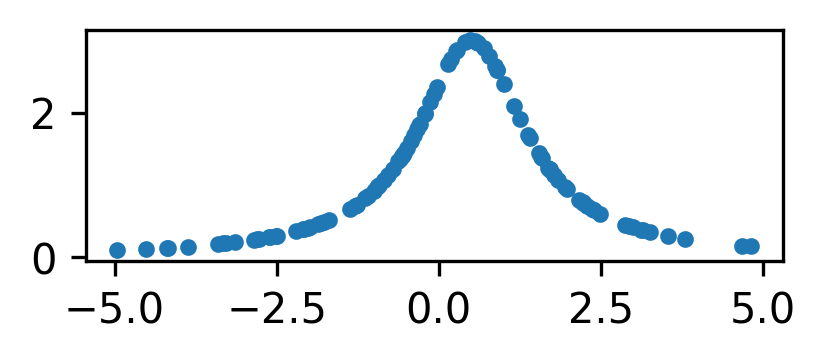

In [18]:
r = requests.get('https://github.com/dmaluenda/hands_on_machine_learning/raw/master/data/curve_fitting_data.npz', stream = True)
data = np.load(BytesIO(r.raw.read()))
print(data)

x = data['x']
y = data['y']

print(x.shape, y.shape)

plt.figure(figsize=(3,1))
plt.plot(x[:100], y[:100], '.')
plt.show()

Since the dataset is huge, create the a function to return two batches arrays (for $x$ and $y$) of a certain length given by the $M$ `batchsize` argument.

So, randomly pick a $M$ number of elements on the whole $x$ input array and their corresponding $y$ output pairs.

Check your function setting a small number to batchsize (e.g. $M=4$), and print the returned $x$ and $y$.

Let's compare the randomly initialized model with the ground truth dataset, using just some randomly picked points.

Thus, plot $M=40$ randomly picked samples from the dataset by using the function done above. Then, plot the network prediction for that same input in the same figure.

> Check the `plt.scatter()` matplotlib's function.

Add a legend to easily identify which data is from the dataset and which is the prediction.

Set the $x$-axis limits to $[-4, 4]$

### 1.2 Cost function (also known as loss function)

The fitting shown above is probably poor. However, we need to quantify the 'quality' of the current fitting by a numeric value. In other words, a cost function is a function to evaluate the quality of the fitting.  We will use the most simple cost function: the square of the discrepancy between the predicted values with the ground truth, averaged over all the evaluated samples. Notices that is a single value, known in this case as mean squared error (MSE).

\begin{equation}
\label{eq:loss_func}
C(\omega; y) = \frac{1}{2} \left\langle \left[ y\,(x; \omega) - y_{\rm truth}(x)\right]^2 \right\rangle_{\!_M}
\end{equation}

where $y(x; \omega) = g(x; \omega_0, \omega_1)$ is the prediction made by the current state of the model and over a certain $x$ input set, and $y_{\rm truth}(x)$ is the output pair of each $x$ input taken from the ground truth dataset. $\left\langle \cdot \right\rangle_{\!_M}$ denotes the average over all $M$ evaluated samples.

> the $1/2$ factor is just to make things easier when deriving that cost function

Notice that cost function $C$ indirectly depends on the dataset $(x, y)$. However, the main dependency is on the $\omega$ free parameters. We will focus on this in a while.

[Check this to see more cost/loss functions](https://www.theaidream.com/post/loss-functions-in-neural-networks).

<hr>

Create a function that returns the MSE-cost for a given set of pairs predicted-true values.

Usually the cost is calculated just for validation purposes. For fitting/training purposes, we only work with its derivative, as we will see in a while. 

However, since this example have only two trainable parameters, it is worth to check how the cost looks in what is called the *cost landscape*. This is an image where the axis represent the trainable parameters and the color is for the cost reached by this parameters combination.

<hr>

Create a function, which returns a $40\times40$ matrix containing the MSE-cost when $\omega_0$ is in range $[-3, 6]$ and $\omega_1$ in $[-2, 3]$. The MSE-cost have to be evaluated using a given $(x, y)$ values from the dataset.

Run this function using a $M=20$ randomly picked $(x,y)$ samples, and plot with the `imshow` function the obtained landscape. 

Run several times this code cell. Is the landscape changing? Why?

What happens when using more (or less) randomly picked samples, by increasing the $M$ (`batchsize`)?

Should the cost landscape ideally depend on the specific $(x, y)$ values?

***Optional***: Replace the `imshow` with `contourf` and `contour` to easily visualize the changes between runs.

### 1.3 Stochastic gradient descent

The gradient descent algorithm is based on walking to the minimum cost, by means of stepping down the gradient of that cost landscape.

In math, the gradient is typically done over the space coordinates ($x$, $y$, $z$...). However, the cost function depends on the trainable parameters $\omega$ or, better said, we want to modify $\omega$ to get better results in prediction time (reducing the MSE). Thus, the gradient here is a vector whose components are the partial derivatives respect to each trainable parameter $\omega_i$.

\begin{equation}  \label{eq:gradient}
\vec{\nabla_{\omega}} C(\omega; y) = \left( \frac{\partial C(\omega; y)}{\partial \, \omega_0} \; , \;  \dots \; , \; \frac{\partial C(\omega; y)}{\partial \, \omega_i} \; , \; \dots \; , \; \frac{\partial C(\omega; y)}{\partial \, \omega_{N_{\omega}}} \right)
\end{equation}

where $C(\omega; y)$ depends essentially on the different parameters $\omega_i$ ; ($i=0\dots N_{\omega}$).
Take into account that $x$ and $y$ are here just the environ where to compute the cost, but they do not play any other role in the training (*stochastic-ness* comes from here). All training focus are over the $\omega$ trainable parameters, not over $(x,y)$.

Remember the goal of the stochastic gradient descent is to update the trainable parameters by following the gradient. However, cost does not depend directly on $\omega$, but it indirectly does through the inference function $y=g(x;\omega)$. So, it is worth to apply the chain rule for the derivatives.

$$\omega_i^{\text{new}} = \omega_i - \eta \, \delta(\omega_i) = \omega_i - \eta \, \frac{\partial C(\omega;y)}{\partial \omega_i} \quad ; \quad (i=0,N_{\omega})$$
\begin{equation}\label{eq:grad_desc_func}
 = \omega_i - \eta \, \frac{\partial C(\omega;y)}{\partial y(x;\omega)} \, \frac{\partial y(x;\omega)}{\partial \omega_i}\quad \quad \quad \quad \quad \quad \;\;\,
\end{equation}
$$\ = \omega_i - \eta \,  \left\langle \big[ y(x;\omega_0, \omega_1) - y_{\rm truth}(x) \big] \, \frac{\partial y(x; \omega)}{\partial \omega_i} \right\rangle_{\!_M}$$


where $\eta$ is the learning rate (how fast we want to progress during the training) and $\delta(\omega_i)=\frac{\partial C(\omega;y)}{\partial \omega_i}$ is the gradient step for each $\omega_i$ trainable parameter.

$\frac{\partial C(\omega;y)}{\partial y(x;\omega)}$ is easily derived from Eq. (\ref{eq:loss_func}) and its just a scalar factor (not a vector). It basically contains the inference of the current model over an input and its comparison with the ground truth.

Finally, $\frac{\partial y(x;\omega)}{\partial \omega_i}$ is the analytical gradient of $g(\cdot)$ over the weights, Eq. (\ref{eq:func_def}). It only depends on the model architecture (relation between inputs, weights and outputs) and it is the core of the backpropagation algorithm.

In this particular case
$$\vec{\nabla_{\omega}} y(x;\omega) = \vec{\nabla_{\omega}} g(x;\omega_0, \omega_1) = \left( \dots \; , \; \frac{\partial g(x; \omega)}{\partial \omega_i} \; , \; \dots \right) = \left( \frac{1}{(x - \omega_1)^2 + 1} \; , \; \frac{+2(x-\omega_1)\omega_0}{\left[(x-\omega_1)^2+1\right]^2}  \right)$$

Notice that, since we deal with many input samples $x$, all this should be averaged over all $M$ samples, see the angle brackets $\langle \cdot \rangle_{\!_M}$ in Eq. (\ref{eq:grad_desc_func}), coming from Eq. (\ref{eq:loss_func}).

<hr>

Create a function which calculates the gradient step $\delta(\omega) = \frac{\partial C(\omega;y)}{\partial \omega_i}$ in this particular case, for a given $\omega$ and $(x, y)$ ground truth data points and $y$ predicted outputs. 

How many components should this gradient step have?

This function might return not only the $\delta(\omega)$, but also the MSE-cost in the current state and with the current batch of data. This last may be useful to monitor the training process.

Create a function to perform a train step. This is `your_training_function` (needed in a while):

0. The function should take as arguments the current $\omega$, the learning rate $\eta$ and the `batchsize`, in this specific order.
1. Get a random sample of the ground truth data: a batch of $(x,y)$ input-output pairs from the dataset, this will be the ground truth in this training step. (Use the function done at the beginning of this tutorial)
2. Update the $\omega$ according to the *gradient_step*  function done before.
3. Return the following variables: the $x$ input batch, the $y_{\rm truth}$ target output, the $y$ predicted output, the $C$ MSE-cost obtained in this step (before updating the omegas), and the new $\omega$ parameters (in this specific order).

Follow the instructions 0. and 3. in detail to be able to monitor the training with the fancy function some cells below.

Make a loop of to apply some training steps (using the function you have just made) and store in a list the MSE-cost returned in every iteration. Plot that list.

Plot the prediction of the model over a random batch of inputs and compare it with the ground truth. This is exactly like at the end of section 1.1.

Has the fitting improved? Is it good enough?

If not, run again the training loop and plot again the prediction (against the ground truth).

How many steps are needed to get an acceptable fitting?

Ok. Now, let's see in more detail what are happening during this training loop.

To do that, we will see how the $\omega$ descend the gradient on the cost landscape.

First, let's define some functions to fancy plot the progress.

In [ ]:
def plot_curves(x, true_y, fit_y, legend=True, ax=None):
    ax = plt.gca() if ax==None else ax

    ax1 = ax.scatter(x, true_y, color="blue", label='ground truth')
    ax2 = ax.scatter(x, fit_y, color="orange", label='fitting')
    ax3 = ax.plot([x, x], [true_y, fit_y], 'y:', linewidth=1, 
                  label='deviation')
    
    if legend:
        ax.legend(handles=[ax1, ax2, ax3[0]], loc='upper left', fontsize=6)
    ax.set_xlim(-4,4)
    ax.set_xlabel("$x$")
    ax.set_ylabel(f"$y=f(x;{omegas})$", fontsize=6)

    
def plot_landscape(true_y, true_x, ws, ax=None):
    ax = plt.gca() if ax==None else ax
    
    Nw = 40
    
    # The landscape is on omegas, WHY?
    w0s = np.linspace(-3, 6, Nw)  # exploring from -3 to 6 for th0 (40 samples)
    w1s = np.linspace(-2, 3, Nw)  # exploring from -2 to 3 for th1 (40 samples)

    landscape = np.zeros([Nw, Nw])  # init landscape
    for j0, w0 in enumerate(w0s):
        for j1, w1 in enumerate(w1s):
            pred_y = w0 / ( (true_x-w1)**2 + 1.0 )
            landscape[j1, j0] = 0.5 * np.mean((pred_y - true_y)**2)
    
    im = ax.contourf(landscape, extent=[-3, 6, -2, 3])
    plt.colorbar(im, ax=ax)
    ax.contour(landscape, extent=[-3, 6, -2, 3], colors="white")

    ax.set_xlabel(r'$\omega_0$')
    ax.set_ylabel(r'$\omega_1$')

    
def plot_info(x, true_y, pred_y, omegas, stepping, history, arrows=True):
    """ This is a funtion to plot the progress on the training.
    """
    max_MSE = history.max()*1.1 if history.size>0 else 1  # skipping empty hist.
    
    clear_output(wait=True)
    fig = plt.figure(figsize=(5,3))
    gs = fig.add_gridspec(2, 2, hspace=.35, wspace=.3)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[1, :])
    
    plot_curves(x, true_y, pred_y, legend=True, ax=ax1)  # compare fiting with truth
    plot_landscape(true_y, x, omegas, ax2)  # to see the progress

    # plot where we are on the landscape
    ax2.scatter([omegas[0]], [omegas[1]], color="orange")  
    if arrows:  # where we go
        ax2.arrow(*(omegas),*(-stepping), color='yellow',
                  width=0.05, length_includes_head=True)
    
    # let's plot the cost history
    ax3.plot(range(history.size), history, marker='o')
    ax3.set_xlim(0, history.size-1)
    ax3.set_xticks(range(0, history.size, 3))
    ax3.set_ylim(0.0, max_MSE)
    ax3.set_xlabel(r"$step$")
    ax3.set_ylabel(r"$MSE$")
    
    plt.show()

def animated_train(your_func, eta, batchsize, init_omegas=None, nsteps=20):
    if init_omegas is None:
        global omegas  # let's continue where we was
    else:
        omegas = init_omegas

    cost_history = np.zeros(nsteps)
    delta_w = 0
    for n in range(nsteps):  # it can be replaced with a while with some criteria

        old_omegas = omegas.copy()
        x, y_true, y_pred, cost, omegas = your_func(omegas, 0.7, 100)
        delta_w = old_omegas - omegas
        
        # let's plot where we are and where we go
        plot_info(x, y_true, y_pred, old_omegas, delta_w, cost_history, True)
        print('estimated omega:', omegas)
        sleep(0.5)
        
        cost_history[n] = cost
        
        plot_info(x, y_true, y_pred, omegas, delta_w, cost_history, False)
        print('estimated omega:', omegas)
        sleep(0.7)

Run the function below where the first argument is the training function you defined in a couple of cells above.

Play with the parameters `eta` and `batchsize`.

How does it influence learning progress?

In [ ]:
# your_func: The trining funtion defined by your own. It has to follow the given instructions for the arguments and returning variables.
# eta: "learning rate" (gradient descent step size)
# batchsize: stochastic x samples used per step (just a few to be fast)
# itit_omegas: the starting training process

animated_train(your_func='your_training_function', eta=1.85, batchsize=300, init_omegas=[-2.3, 0.8])  # I modified this <===========  1.65 ; 300

Why we are not going directly to the minimum of the landscape?


Why is this algorithm ***Stochastic*** *Gradient Descent*? Check the meaning and reason of a [stochastic](https://www.geeksforgeeks.org/ml-stochastic-gradient-descent-sgd/) approach.

### 1.4 Non constant learning rate (Schedule or Adaptive)

**Optional**: Modify the `train_step` in such a way to run with a non constant learning rate.

[Check this to know more on learning rate](https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1)

## 2. Backpropagation

Like in the Stochastic Gradient Descent, we update trainable parameters of a neural network (weights and biases) in the following way

\begin{equation} \label{eq:grad_desc1}
\omega_{ij}^l = \omega_{ij}^l - \eta \, \delta(\omega_{ij}^l)
\end{equation}
\begin{equation} \label{eq:grad_desc2}
b_{i}^l = b_{i}^l - \eta \, \delta (b_{i}^l)
\end{equation}

where $l=1\dots L$ label runs over all the net layers, $i=1\dots N_l$ and $j=1\dots N_{l-1}$ labels run over all the $N_l$ neurons of the $l$-th layer, and $\delta (\omega) = \frac{\partial C(\omega;x)}{\partial \omega}$ is the gradient step to update the parameters, where $\omega$ includes all weights and biases.

In neural networks, the cost function $C(\omega;y)$ can have a very deep dependency on weights and biases, especially those corresponding to the first layers. However, this deep dependency can be solved by means of the derivative chain rule. Moreover, the calculations done to estimate the gradient step for the last layers can be reused for deeper layers, as we recall below.

* **Output layer** ($l=L$):

The gradient step $\delta$ to update weights $\omega^{L}_{ij}$ and biases $b^{L}_{i}$ of the last layer ($l=L$), according to Eq. (\ref{eq:grad_desc_func}), is

\begin{equation} \label{eq:delta_a}
\delta(\omega^L) = \frac{\partial C(\omega;y) }{\partial \omega^L }
                 = \frac{\partial C(\omega;y) }{\partial y^{L}_{i} }\frac{\partial y^{L}_{i} }{\partial \omega^{L} } 
\end{equation}
                        
where $\omega^L$ stands for any trainable parameter on the last layer; both, $\omega^{L}_{ij}$ and $b^{L}_{i}$. Notice that the first factor depends only on the cost function, whereas the second one only does on the arquitecture of the network.

Taking the simple MSE-cost function $C = \frac{1}{2} \left( y_i^L - \hat{y}_i \right)^2$, where $\hat{y}_i=y^{\rm truth}_i$ is the ground truth result for the $i$-th component (neuron) and $y_i^L=y_i^L(x;\omega)$ is the actual value gotten with the current network state; we just simplify the notation.

Notice that current output value can be expressed as a combination of the previous layer: 
\begin{equation}
y_i^L = f_L\!\!\left[x_j^{L}\right] =  f_L\!\!\left[\omega_{ij}^{L}y_j^{L-1} + b_i^L\right]
\end{equation}
where $f_l[\cdot]$ is the activation function for the $l$-th layer, then

\begin{equation} \label{eq:dC_dy_last}
\frac{\partial C }{\partial y^{L}_{i} } = \left( y_i^L - \hat{y}_i \right) \end{equation}

this is just the deviation between the predicted result and the ground truth.


On the other hand,

\begin{equation} \label{eq:dy_dw_last}
\frac{\partial y^{L}_{i} }{\partial \omega^{L}_{ij} } = f'_L\!\!\left[ x_i^L\right] \, y_j^{L-1} \end{equation}

\begin{equation} \label{eq:dy_db_last}
\frac{\partial y^{L}_{i} }{\partial b^{L}_{i} } = f'_L\!\!\left[ x_i^L\right] \end{equation}

This two last expressions only contain the current value returned by certain neurons $y_j^{L-1}$ and the value when using the derivative of the activation function, instead.

For convenience, let's define
\begin{equation} \label{eq:delta_i}
\boxed{ \Delta^{\!L}_i = \left( y_i^L - \hat{y}_i \right) \, f'_L\!\!\left[ x_i^L\right] }
\end{equation}

Finally,

\begin{equation} \label{eq:omega_ij}
\boxed{ \delta(\omega_{ij}^L) = \Delta_i^{\!L} \otimes y_j^{L-1} }
\end{equation}
\begin{equation} \label{eq:b_i}
\boxed{ \delta(b_{i}^L) = \Delta_i^{\!L} }
\end{equation}

These boxed equations is all we need to be able to update the weight and biases of the last layer. Of course, all calculus made above are computed with matrices and vectors of indices $i$ and $j$. Notice that $\otimes$ stands for the outer product, which generates a matrix from two vectors. Moreover, usually it is processed with batches of input-output pairs, where final values are averaged for those batches. An efficient way to implement this in batches is explained at the end of this cell.

* **Last hidden layer**:

The procedure is exactly the same than before. However, in order to update weights $\omega^{L-1}_{jk}$ and biases $b^{L-1}_{j}$ of the last hidden layer ($l=L-1$), Eq. (\ref{eq:delta_a}) becomes

\begin{equation} \label{eq:delta_a2}
\delta(\omega^{L-1}) = \frac{\partial {C} }{\partial \omega^{L-1} }
            = \frac{\partial {C} }{\partial y^{L}_{i} }
              \frac{\partial y^{L}_{i} }{\partial y^{L-1}_{j} }
              \frac{\partial y^{L-1}_{j} }{\partial \omega^{L-1} } 
\end{equation}
Therefore,
\begin{equation} \label{eq:omega_jk}
{ \delta(\omega_{jk}^{L-1}) = \Delta_i^{\!L} \; \omega_{ij}^L \, f'_{L-1}\!\!\left[ x_j^{L-1}\right] \otimes y_k^{L-2} = \Delta_j^{\!L-1} \otimes y_k^{L-2} }
\end{equation}
\begin{equation} \label{eq:b_j}
{ \delta(b_{j}^{L-1}) = \Delta_i^{\!L} \; \omega_{ij}^L \, f'_{L-1}\!\!\left[ x_j^{L-1}\right]  = \Delta_j^{\!L-1}}
\end{equation}

* **General formula**:

Notice that Eqs. (\ref{eq:omega_jk}, \ref{eq:b_j}) can be generalized for any layer $l=L-m$ as
\begin{equation} \label{eq:omega_pq}
\boxed{ \delta(\omega_{pq}^{l}) = \Delta_p^{\!l} \otimes y_q^{l-1} }
\end{equation}
\begin{equation} \label{eq:b_p}
\boxed{ \delta(b_{p}^{l}) = \Delta_p^{\!l} }
\end{equation}
where
\begin{equation} \label{eq:delta_p}
\boxed{ \Delta_{p}^{l} = \Delta_{r}^{\!l+1}  \cdot \omega_{rp}^{l+1} \, f'_{l}\!\!\left[ x_p^{l}\right] } \quad ; \quad (l=L-1\dots 1)
\end{equation}

Notice that Eq. (\ref{eq:delta_p}) shows as the error $\Delta$ done in the prediction is backpropagated according with weights and activations of every layer.

* **General notes**:

Notice that boxed equations contain all the backpropagation process. For Eq. (\ref{eq:delta_i}), we need the prediction $y_i^L$ and the derivative of the last step $f'_L\!\!\left[ x_i^L\right]$. Moreover, we also need all the intermediate values $y_p^{l}$ and their derivatives $f'_l\!\!\left[ x_p^l\right]$ for Eq. (\ref{eq:omega_pq}, \ref{eq:delta_p}). Therefore, the forward prediction (inference) is needed in every training step, not only to get the cost value and its derivative (Eq. \ref{eq:delta_i}), but also in such a way to store all intermediate neurons values $y_p^{l}$ and their derivative $f'_l\!\!\left[ x_p^l\right]$. Then, all the effort is to make forward inferences storing the intermediate states and its derivatives and, then, apply the backprogation depicted in Eq. (\ref{eq:delta_p}).

That's it!


* **Implementation in batches**:

As we said before, we must be able to accept input-output pairs in batches in order to increase the performances (in time and in precision, recall stochasticness/batchsize relation). Then, all variables regarding data should earn an extra dimension. These means that weights and the biases, and their gradient steps remain like in equations above. In practice, we need just to be carefully with the shape and order of the products. This is, since we want to average all values over the batches, then to compute Eqs. (\ref{eq:omega_ij}, \ref{eq:omega_pq}) we have to do a dot product (sum-product) with the batch index as inner index and divide by the batchsize. Similarly, for Eqs. (\ref{eq:b_i}, \ref{eq:b_p}) we have to sum over the $\Delta$ and divide by the batchsize. In addition, the inner index of $\Delta \cdot \omega$ (in Eq. \ref{eq:delta_p}) is the repeated index $r$, getting a shape of `batchSize`$\times$`layerSize`. Finally, this is multiplied element-wise for the activation contribution, like in Eq. (\ref{eq:delta_i}).

### 2.1 Implement of backpropagation for a general (fully connected) network

Let's do it step by step.

Create a function doing a layer step, ready for training. This is, given an input vector $x$, a weights matrix $\omega$, and a biases vector $b$, it computes the matrix operation (linear superposition) and separately apply the activation function and its derivative. Then, it returns both the result of apply the activation function and its derivative.

Use the *Sigmoid* as activation function, for instance.

Just for testing, run this function you have just created for a layer-step dealing with 5 input and 7 output neurons, and a batchsize of 100.

Create a valid $\omega$ weights matrix, $b$ biases vector and $x$ input array. Use random numbers.

Which size should the result be? Check it.

Well.

Create now a function to predict (inference) the result after apply the whole network for a given input vector $x$, a list of weights $[w]_l$ (one weights matrix for each layer) and a list of biases $[b]_l$ (idem), for $l=1\dots L$ being $L$ the number of layers in the network. You may iteratively use the last function.

Remember, you will need, not only the final result, but also all inner states of the neurons $y_q^{\,l}$ and their derivative $y\prime_q^{\,l}=f'_{l}\!\!\left[ x_p^{l}\right]$. So, store and return a couple of list of neurons states $[y_q]_l$, one for the common state and the other for its derivative $[y_q^{\,\prime}]_l$, for $l=1\dots L$.

Well, just for testing, run this function you have just created for a 3 layers network with 5, 7, 3 neurons each layer, and a batchsize of 100.

Create a valid $[\omega]_l$ list of weights matrices, $[b]_l$ list of biases vectors and $x$ input array. Use random numbers.

Which size should the result be? Check it.

Create a function to back propagate the error prediction evaluated by the cost function. Thus, you should take the ground truth $y_i^{\rm truth}$ and the current parameters, i.e. the weights list $[\omega]_l$ and biases list $[b]_l$ in the arguments.

This function have to return the gradient steps $\delta(\omega)$ and $\delta(b)$.

Note that $\delta(\omega)$ and $\delta(b)$ have to be equal in size than $\omega$ and $b$, then they are list of matrices ($\omega$) and vectors ($b$). Thus, you can initialize them using the `np.zeros_like(a)` numpy's function.

Then, you can fill their last item following Eqs. (\ref{eq:omega_ij}, \ref{eq:b_i}), using Eq. (\ref{eq:delta_i}).

Finally, you can fill them recursively backwards following Eqs. (\ref{eq:omega_pq}, \ref{eq:b_p}), using Eq. (\ref{eq:delta_p}).

Note that you will need all inner states of the neurons $[y_q]_l$ and their derivative $[y^{\,\prime}_q]_l$, so ask for them in the arguments.

Take into account that all data variables has an extra dimension for batch processing and, then, you have to average over that dimension to get an stochastic result.

Let's put it together.

Create a function to perform a training step. This is to update the trainable parameters downing the gradient.

To do that apply forward (inference) the whole network while storing the inner states (and their derivative) by means of the function defined before.

Then, take that inner states and apply the backpropagation to get the gradient steps $\delta(\omega)$ and $\delta(b)$.

Now, you can update the weights and biases following the Eqs. (\ref{eq:grad_desc1}, \ref{eq:grad_desc2}).

Finally, compute the MSE-cost of the network.

We will use this function to completely train a network, then it is important to check that:

- it has as argument: the input data $x$, the ground_truth $y^{\rm truth}$, the current weights list $[\omega]_l$, the current biases list $[b]_l$, and the learning rate $\eta$.

- it returns: the predicted result $y^L$, the cost $C$, the updated weights list $[\omega^{\rm new}]_l$, and the updated biases list $[b^{\rm new}]_l$

### 2.2 Train a net on batches to fit a 2D function (an arbitrary image)

Define a network having 3 layers with 2 input neurons, 100 hidden neurons, and 1 single output neuron.

Define an inference function to evaluate the network for a given input and weights/biases.  Use as activation function the sigmoid function.

Use the next nonlinear function as a ground truth, so as the target behavior of the network.
Yes it is an arbitrary image

In [ ]:
def get_content(url):
    return requests.get(url).content

# load the pixel image
URL = "https://github.com/dmaluenda/hands_on_machine_learning/raw/master/data/Smiley.png"
face = imageio.imread(get_content(URL))

pixel_image = face[:,:,0]
pixel_image = pixel_image[:,::-1].astype('float64')  # and flip... to get the right view!

pixel_image += np.random.uniform(low=0, high=0.2*pixel_image.max(), size=pixel_image.shape)

# normalize between 0 and 1
pixel_image -= pixel_image.min()
pixel_image = (pixel_image.astype(dtype='float'))/pixel_image.max()*2 - 1  # [-1, 1]

image_size = np.shape(pixel_image)[0] # assuming a square image!
print(pixel_image.shape)

plt.figure(figsize=(2,2))
plt.imshow(pixel_image)

Define a function to get a `batchsize` number of representations for the target function within a range.

Show the batch of pixels in a image

Let's define a function to evaluate the training, this is by testing the whole function scope.

Make a function to evaluate the cost

Run the training step function (backpropagation) several times to train the network and recover the target image (smiling)

## 3. Save and load a model

Where are the information about the model?

Save that information using the `np.savez()` function.

Let's see how we can recover a whole neural network model and state.

Load that information in a new network and reproduce the image without making any new training.

## 4. Inside a network

Set to 0 all the weights on the last layer step except for one of the neurons and plot the result.

Repeat this for all the rest last weights (100 in total) and check the produced images.

## 5. Play with https://playground.tensorflow.org 